In [23]:
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

# Open RGB image and convert to grayscale

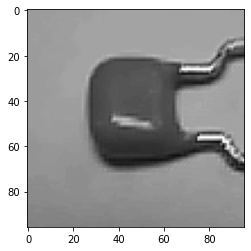

In [18]:
image = Image.open("0.png")

#convert to grayscale
image = image.convert('L')

plt.imshow(image, cmap='gray', vmin=0, vmax = 255)

#Another way to convert image and save as grayscale
#gray_image = ImageOps.grayscale(image)
#gray_image.save('gray_image.png')

## Convert digital image into a numpy array

In [20]:
### Convert the Image object to a Numpy array

# Save your Numpy array in the 'img_array' variable
image_array = None

# >>> ENTER YOUR CODE HERE <<<

# Convert image to Numpy array
image_array = np.asarray(image)

In [22]:
### View details about the array: print the shape, entire array, first row, and first column
# Note that Python may leave out some values when printing the entire array.
# Make sure that the first row and first column look correct!

# >>> ENTER YOUR CODE HERE <<<

# Print the shape of the array
print("Shape:", image_array.shape)

# Entire array
print("Array:", image_array)

# Print the first row
print("First row:", image_array[0,:])

# Print the first column
print("First column:", image_array[:,0])

Shape: (96, 96)
Array: [[155 155 156 ... 161 161 161]
 [155 155 155 ... 161 161 163]
 [155 155 155 ... 161 161 163]
 ...
 [131 131 131 ... 141 141 142]
 [128 128 128 ... 139 139 141]
 [131 131 131 ... 139 139 139]]
First row: [155 155 156 156 155 155 155 155 155 155 155 155 155 158 158 158 158 158
 158 158 157 157 158 158 157 157 158 158 158 161 161 161 161 161 161 161
 163 163 163 163 163 163 163 163 161 163 163 163 163 163 163 163 163 163
 163 163 163 163 163 163 163 163 163 163 161 163 163 163 161 161 163 163
 163 163 163 163 163 163 163 163 163 163 163 163 163 163 163 163 163 161
 158 158 161 161 161 161]
First column: [155 155 155 155 155 155 155 155 154 152 155 155 155 155 155 155 155 155
 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155
 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 152 152 152
 150 150 149 150 147 147 147 149 147 147 147 147 147 147 147 147 147 147
 147 147 141 141 141 139 139 139 139 139 139 139 139 139 133 133 133 133
 131

# Resize Image

In [24]:
### Use the "resize" function to resize your image array to 28x28 pixels.
# Set the "anti_aliasing" parameter to True.
# Print the array's shape(it should be (28, 28))

# Save the  resized image in the 'image_resized' variable
image_resized = None

# Height and width parameters
new_height = 28
new_width = 28

# Resize the image
image_resized = resize(image_array, (new_height, new_width), anti_aliasing=True)

# Print the new array shape
print("New array shape:", image_resized.shape)

New array shape: (28, 28)


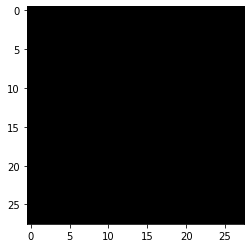

In [25]:
### View the new array as an image (this should look all black--that's OK!)

# At this point, the resized image should be saved in the 'image_resized' variable
plt.imshow(image_resized, cmap='gray', vmin=0, vmax=255)

In [26]:
# Go back to get 8-bit grayscale values
### Convert the normalized 0.0 to 1.0 values in your image to 0 to 255 integers
# Save this 8-bit array back into the 'img_resized' variable
# Round or truncate all elements to integer values (no floating point decimals)
# Make sure all elements are between 0 and 255 (known as "clamping")

# You can simply multiply a Numpy array by a constant to multiply all elements by that number
image_resized = image_resized * 255

# We need to round (you can also truncate) all elements
image_resized = np.rint(image_resized)

# Convert all elements to integers
image_resized = image_resized.astype(int)

# Clamp values to 0 and 255
image_resized = np.clip(image_resized, 0, 255)

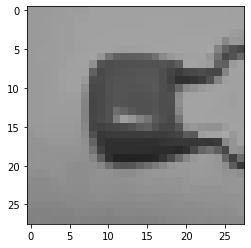

In [27]:
#Draw the image again

# At this point, the resized image should be saved in the 'image_resized' variable
plt.imshow(image_resized, cmap='gray', vmin=0, vmax=255)

# Draw a white bounding box rectangle on this image

In [28]:
### Change the required elements in the Numpy array so that a 10x10 white square is drawn in the 
# middle. Try to avoid using for loops if possible.

# Start with your resized image
image_with_box = np.copy(image_resized)

# Shape of box
box_h = 10
box_w = 10

# Get the height and width of the image
image_h = image_with_box.shape[0]
image_w = image_with_box.shape[1]

# Find coordinates of first line
x0 = int((image_w / 2) - (box_w / 2))
x1 = int((image_w / 2) + (box_w / 2))
y0 = int((image_h / 2) - (box_h / 2))

# Change slice of image array elements to 255
image_with_box[y0, x0:x1] = 255

# Find coordinates of second line
x0 = int((image_w / 2) - (box_w / 2))
x1 = int((image_w / 2) + (box_w / 2))
y0 = int((image_h / 2) + (box_h / 2))

# Change slice of image array elements to 255
image_with_box[y0, x0:x1] = 255

# Find coordinates of third line
x0 = int((image_w / 2) - (box_w / 2))
y0 = int((image_h / 2) - (box_h / 2))
y1 = int((image_h / 2) + (box_h / 2))

# Change slice of image array elements to 255
image_with_box[y0:y1, x0] = 255

# Find coordinates of fourth line
x0 = int((image_w / 2) + (box_w / 2))
y0 = int((image_h / 2) - (box_h / 2))
y1 = int((image_h / 2) + (box_h / 2) + 1) # Last index is non-inclusive, so we need to add +1 here

# Change slice of image array elements to 255
image_with_box[y0:y1, x0] = 255

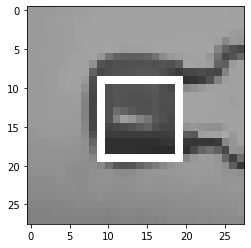

In [29]:
### Draw the image--you should see a white squre in the middle!

# Your image should be saved in the 'img_with_square
plt.imshow(image_with_box, cmap='gray', vmin=0, vmax=255)